C:\Users\Niklas\AppData\Local\Temp\ipykernel_3012\2756526310.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['DateTime'].dt.month


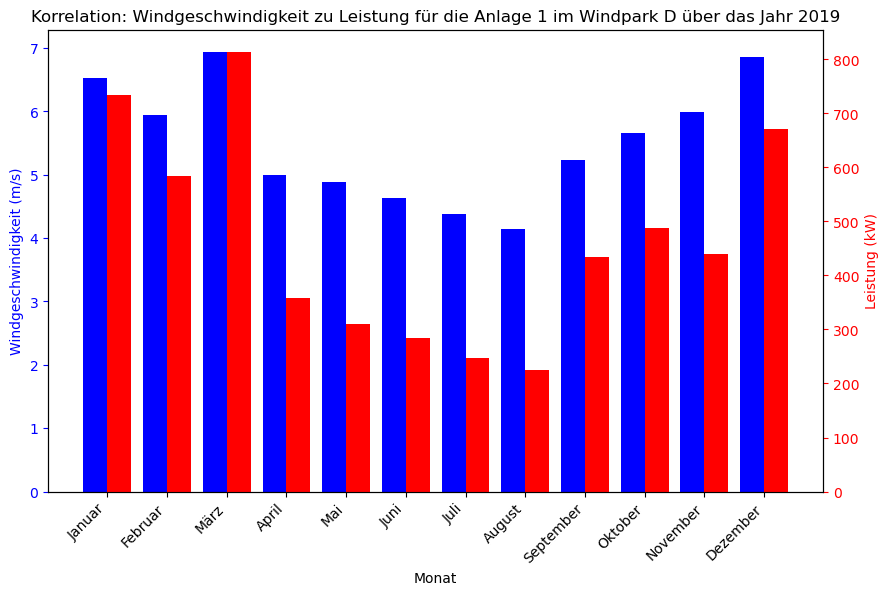

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
import numpy as np


def get_months(ids: pd.Series) -> List[str]:
  months: List[str] = ['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember']
  labels: List[str] = []
  for id in ids:
    labels.append(months[id - 1])

  return labels
year = 2019
cwd=os.getcwd()
parent_directory=os.path.dirname(cwd)
feather_file = f'{parent_directory}/scaled_data/wind_farm_d/facility_1.feather'
df = pd.read_feather(feather_file)
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%f%z')
df2=df[df['DateTime'].dt.year == year]
df2['Month'] = df2['DateTime'].dt.month
df3 = df2.groupby(['Month'])['Windgeschwindigkeit'].mean().reset_index()
df3["Leistung"] = df2.groupby(['Month'])['Leistung'].mean().reset_index()["Leistung"]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(np.arange(len(get_months(df3['Month']))) - 0.2, df3['Windgeschwindigkeit'], color='b', label='Windgeschwindigkeit',width=0.4)
ax1.set_xlabel('Monat')
ax1.set_ylabel('Windgeschwindigkeit (m/s)', color='b')
ax1.set_xticks(np.arange(len(get_months(df3['Month']))))
ax1.set_xticklabels(get_months(df3['Month']), rotation=45,ha="right")
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.bar(np.arange(len(get_months(df3['Month']))) + 0.2, df3['Leistung'], color='r', label='Leistung',width=0.4)
ax2.set_ylabel('Leistung (kW)', color='r')
ax2.tick_params('y', colors='r')

plt.title(f'Korrelation: Windgeschwindigkeit zu Leistung der ersten Anlage im Windpark D über das Jahr {year}')

plt.show()
